In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading dataset...")
MINI = True
COMBINE_VMID = True
INPUT_SEQ_LEN = 20
OUTPUT_SEQ_LEN = 1
chunksize = 10000000
chunk_limit = 25 if not MINI else 3
SELECT_VMID_NUM = 200
iter = 0
selected_vmid = []
selected_vmid_to_site_id = {}
total_df = []

# for chunk in pd.read_csv("dataset/fromCloudToEdge/VM_CPU.csv", chunksize=chunksize, low_memory=False):
#     print(f"Processing chunk {iter}...")
#     iter += 1
#     if iter > chunk_limit:
#         break
#     chunk['timestamp'] = pd.to_datetime(chunk['report_ts'], unit='s')
#     grouped = chunk.groupby('vm_id')
#     if iter == 1:
#         vm_ids = chunk['vm_id'].unique()
#         if len(vm_ids) > SELECT_VMID_NUM:
#             selected_vmid = np.random.choice(vm_ids, SELECT_VMID_NUM, replace=False)
#         else:
#             selected_vmid = vm_ids
#         for vmid in selected_vmid:
#             site_id = chunk[chunk['vm_id'] == vmid]['site_id'].values[0]
#             selected_vmid_to_site_id[vmid] = site_id
#         print(f"Selected {len(selected_vmid)} VMIDs for processing.")
#     total_df.append(chunk[chunk['vm_id'].isin(selected_vmid)])

# df = pd.concat(total_df, ignore_index=True)
if False:
    df = pd.read_csv("selected_vms_cpu_usage.csv")
    print(f"Total VMs in dataset: {len(df['vm_id'].unique())}")
    print(f"Total data points: {len(df)}")

    df['timestamp'] = pd.to_datetime(df['report_ts'], unit='s')
    start_date = df['timestamp'].min()
    end_date = pd.to_datetime(start_date + pd.Timedelta(days=1))
    print(f"Selecting data from {start_date} to {end_date}")
    df = df[(df['timestamp'] >= start_date) & (df['timestamp'] < end_date)]

    selected_vmid = np.random.choice(df['vm_id'].unique(), 10, replace=False)
    df = df[df['vm_id'].isin(selected_vmid)]
    df['cpu_rate'] = df['cpu_rate'].astype(float)
    df = df.sort_values(by=['vm_id', 'timestamp'])

    # 修改vm_id为vm1...vm10
    vmid_map = {vmid: f'vm{idx+1}' for idx, vmid in enumerate(selected_vmid)}
    df['vm_id'] = df['vm_id'].map(vmid_map)

    # 将时间戳转为从0开始的数值
    df['time_idx'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds()
    df['time_idx'] = df['time_idx'].astype(int)

    SIGCOMM_COLORS = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
    ]
    sns.set_style('whitegrid')
    plt.rcParams['axes.linewidth'] = 1.2
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['legend.fontsize'] = 20
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20

    plt.figure(figsize=(8, 5))
    for idx, vmid in enumerate(sorted(df['vm_id'].unique())):
        vm_df = df[df['vm_id'] == vmid]
        vm_df = vm_df.sort_values(by='time_idx')
        smooth_cpu = vm_df['cpu_rate'].rolling(window=10, min_periods=1, center=True).mean()
        plt.plot(vm_df['time_idx'], smooth_cpu,
                label=vmid,
                color=SIGCOMM_COLORS[idx % len(SIGCOMM_COLORS)],
                linewidth=2.5)

    plt.xlabel('Time (seconds)', fontsize=20)
    plt.ylabel('CPU Usage (%)', fontsize=20)
    plt.legend(frameon=False, ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1.18))
    plt.grid(True, linestyle='--', linewidth=1, alpha=0.4)
    sns.despine(top=True, right=True)
    plt.tight_layout()
    plt.savefig('fig-exp-task-trace-com.pdf', bbox_inches='tight', dpi=300)
    plt.show()
    # dump the data
    df.to_csv('selected_vms_cpu_usage.csv', index=False)

Loading dataset...


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
if False:
    print("Loading dataset...")
    MINI = True
    COMBINE_VMID = True
    INPUT_SEQ_LEN = 20
    OUTPUT_SEQ_LEN = 1
    chunksize = 10000000
    chunk_limit = 25 if not MINI else 3
    SELECT_VMID_NUM = 200
    iter = 0
    selected_vmid = []
    selected_vmid_to_site_id = {}
    total_df = []

    # for chunk in pd.read_csv("dataset/fromCloudToEdge/VM_BW_THREE_MONTHS.csv", chunksize=chunksize, low_memory=False):
    #     print(f"Processing chunk {iter}...")
    #     iter += 1
    #     if iter > chunk_limit:
    #         break
    #     chunk['timestamp'] = pd.to_datetime(chunk['report_time'])
    #     print(len(chunk['vm_id'].unique()), "VMs in chunk")
    #     grouped = chunk.groupby('vm_id')
    #     if iter == 1:
    #         vm_ids = chunk['vm_id'].unique()
    #         if len(vm_ids) > SELECT_VMID_NUM:
    #             selected_vmid = np.random.choice(vm_ids, SELECT_VMID_NUM, replace=False)
    #         else:
    #             selected_vmid = vm_ids
    #         print(f"Selected {len(selected_vmid)} VMIDs for processing.")
    #     total_df.append(chunk[chunk['vm_id'].isin(selected_vmid)])

    # df = pd.concat(total_df, ignore_index=True)
    df = pd.read_csv("selected_vms_bw_usage.csv")
    print(f"Total VMs in dataset: {len(df['vm_id'].unique())}")
    print(f"Total data points: {len(df)}")

    df['timestamp'] = pd.to_datetime(df['report_time'])
    df['pub_down_bw'] = df['pub_down_bw'].astype(float)
    df['pub_down_Mbps'] = df['pub_down_bw'] / 1e6  # 转换为Mbps
    start_date = df['timestamp'].min()
    end_date = pd.to_datetime(start_date + pd.Timedelta(days=1))
    print(f"Selecting data from {start_date} to {end_date}")
    df = df[(df['timestamp'] >= start_date) & (df['timestamp'] < end_date)]
    df = df[df['pub_down_Mbps'] > 0]
    df = df[df['pub_down_Mbps'] < 50]

    selected_vmid = np.random.choice(df['vm_id'].unique(), 10, replace=False)
    df = df[df['vm_id'].isin(selected_vmid)]
    df = df.sort_values(by=['vm_id', 'timestamp'])

    # 修改df的vm_id为vm1...vm10
    vmid_map = {vmid: f'vm{idx+1}' for idx, vmid in enumerate(selected_vmid)}
    df['vm_id'] = df['vm_id'].map(vmid_map)

    # 将时间戳转为从0开始的数值
    df['time_idx'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds()
    df['time_idx'] = df['time_idx'].astype(int)

    SIGCOMM_COLORS = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
    ]
    sns.set_style('whitegrid')
    plt.rcParams['axes.linewidth'] = 1.2
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['legend.fontsize'] = 20
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20

    plt.figure(figsize=(8, 5))
    for idx, vmid in enumerate(sorted(df['vm_id'].unique())):
        vm_df = df[df['vm_id'] == vmid]
        vm_df = vm_df.sort_values(by='time_idx')
        smooth_bw = vm_df['pub_down_Mbps'].rolling(window=10, min_periods=1, center=True).mean()
        plt.plot(vm_df['time_idx'], smooth_bw,
                label=vmid,
                color=SIGCOMM_COLORS[idx % len(SIGCOMM_COLORS)],
                linewidth=2.5)

    plt.xlabel('Time (seconds)', fontsize=20)
    plt.ylabel('Bandwidth (Mbps)', fontsize=20)
    plt.legend(frameon=False, ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1.18), fontsize=20)
    plt.grid(True, linestyle='--', linewidth=1, alpha=0.4)
    sns.despine(top=True, right=True)
    plt.tight_layout()
    plt.savefig('fig-exp-task-trace-trans.pdf', bbox_inches='tight', dpi=300)
    plt.show()

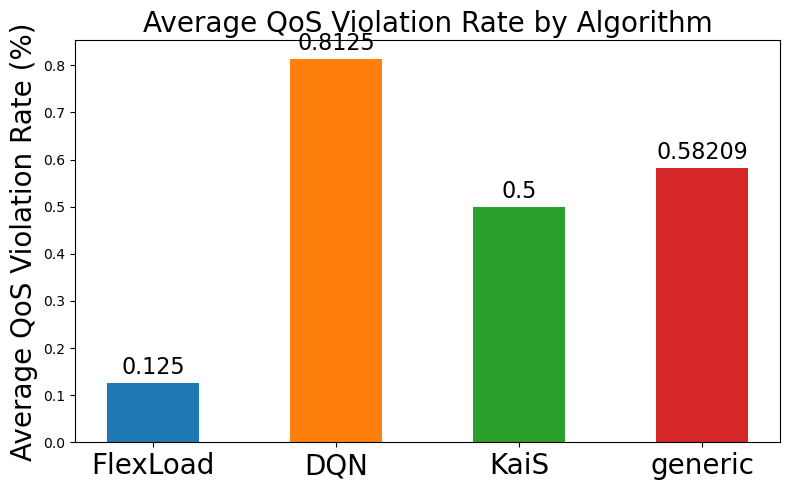

In [10]:
import json
algs = ["UCB", "DQN", "KaiS", "generic"]
file_prefix = "outputs/{}_summary.json"
alg_data = {alg: None for alg in algs}
for alg in algs:
    file_path = file_prefix.format(alg)
    alg_data[alg] =json.load(open(file_path, "r"))
    # print(f"Algorithm: {alg}")
    # print(df.head())
# print("Data loading complete.")
# print(alg_data)

x = np.arange(len(algs))
width = 0.5

fig, ax = plt.subplots(figsize=(8, 5))
rects = ax.bar(x, [alg_data[alg]['qvr_task_rate'] for alg in algs], width, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax.set_ylabel('Average QoS Violation Rate (%)', fontsize=20)
ax.set_xticks(x)
algs[0] = "FlexLoad"
ax.set_xticklabels(algs, fontsize=20)
ax.set_title('Average QoS Violation Rate by Algorithm', fontsize=20)
# ax.legend(fontsize=20)
ax.bar_label(rects, padding=3, fontsize=16)
plt.tight_layout()
plt.savefig('fig-exp-task-qos-violation-rate.pdf', bbox_inches='tight', dpi=300)
plt.show()
